In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from stInfer.trainer import Trainer
from stInfer.untils import cal_pearsonr, gene_impute
from stInfer.dataset import get_OldST_dataloader, get_TenX_dataloader

In [2]:
all_name = [
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6',  # error B3
            'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
            'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
            'E1', 'E2', 'E3',  # error
            'F1', 'F2', 'F3',  # error
            'G1', 'G2', 'G3',
            'H1', 'H2', 'H3', 
           ]  # error

In [3]:
path = './log/OldST_All_B1'

In [4]:
test_name = 'B1'

In [5]:
test_name = [test_name]
train_name = list(set(all_name) - set(test_name))
genes = pd.read_csv('./data/TenX_HVG.csv', index_col=None, header=None).iloc[:, 0].to_numpy()

# train
data_path_train = './data/breast_OldST'
train_dataloader = get_OldST_dataloader(data_path=data_path_train, data_name=train_name, genes=genes, patch_size=(112, 112))
trainer = Trainer(genes=genes, train_dataloader=train_dataloader, result_path=path)
adata_train = trainer.train(name='All')

# test
data_path_test = './data/breast_OldST'
test_dataloader = get_OldST_dataloader(data_path=data_path_test, data_name=test_name, genes=genes, patch_size=(112, 112))
trainer.test_dataloader = test_dataloader
adata_test = trainer.test(name='B1')

# val
adata_train.raw = adata_train
adata_impute = gene_impute(adata_train, adata_test, rep='image_embedding', n_neighbors=1000)
r0 = cal_pearsonr(adata_impute, adata_test, dim=0)[0]
pd.DataFrame(data=r0).to_csv(f'{path}/{test_name[0]}_r0.csv', header=False, index=False)
print('Pearson Correlation:', np.nanmean(r0))
r1 = cal_pearsonr(adata_impute, adata_test, dim=1)[0]
print('Pearson Correlation:', np.nanmean(r1))
pd.DataFrame(data=r1).to_csv(f'{path}/{test_name[0]}_r1.csv', header=False, index=False)

Finished loading all files A1
Finished loading all files B6
Finished loading all files C5
Finished loading all files D5
Finished loading all files D4
Finished loading all files A4
Finished loading all files G1
Finished loading all files G3
Finished loading all files A3
Finished loading all files E1
Finished loading all files E2
Finished loading all files H1
Finished loading all files G2
Finished loading all files B4
Finished loading all files C1
Finished loading all files C6
Finished loading all files H3
Finished loading all files D3
Finished loading all files A6
Finished loading all files F2
Finished loading all files C4
Finished loading all files D6
Finished loading all files A2
Finished loading all files E3
Finished loading all files A5
Finished loading all files F3
Finished loading all files C3
Finished loading all files H2
Finished loading all files D1
Finished loading all files B3
Finished loading all files B2
Finished loading all files D2
Finished loading all files F1
Finished l

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# plot

In [4]:
adata = sc.read_h5ad('./data/breast_OldST_Adata/B1.h5ad')
adata.raw = adata
adata

AnnData object with n_obs × n_vars = 295 × 15109
    obs: 'x', 'y', 'label', 'cell_type', 'array_row', 'array_col', 'pixel_x', 'pixel_y'
    uns: 'cell_type_colors', 'spatial'
    obsm: 'spatial'

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

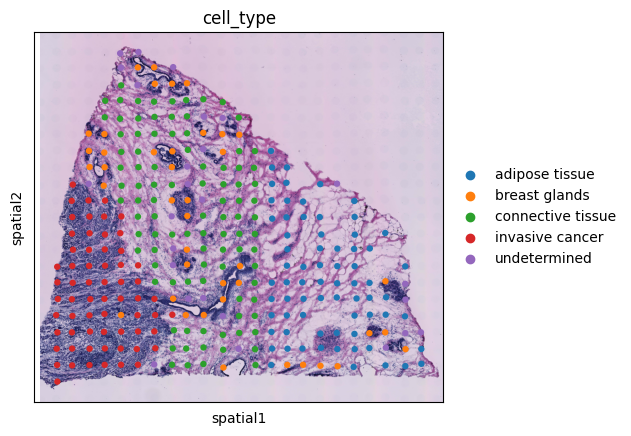

In [5]:
sc.pl.spatial(adata, color=['cell_type'])

In [9]:
adata_train = sc.read_h5ad('./log/OldST_All_B1/adata_train_All.h5ad')
adata_train.raw = adata_train
adata_test = sc.read_h5ad('./log/OldST_All_B1/adata_test_B1.h5ad')

In [10]:
adata_train = sc.read_h5ad('./log/OldST_All_B1/adata_train_all.h5ad')
adata_train.raw = adata_train
adata_test = sc.read_h5ad('./log/OldST_All_B1/adata_test_B1.h5ad')
adata_impute = gene_impute(adata_train, adata_test, rep='image_embedding', n_neighbors=1000)
adata_impute.obs = adata.obs
adata_impute.obsm = adata.obsm
adata_impute.uns = adata.uns
adata_impute.write_h5ad('./log/OldST_All_B1/adata_impute_02.h5ad')

method 2 fast


In [11]:
r1 = cal_pearsonr(adata_impute, adata_test, dim=1)[0]
pcc = pd.DataFrame(data = r1, index=adata_impute.var.index)
pcc = pcc.sort_values(0, ascending=False)
pcc

,0
HLA-B,0.808444
CXXC5,0.764276
IGFBP4,0.759120
SEC14L2,0.747989
GNAS,0.740794
...,...
CBLC,0.035823
IGHG4,0.025163
ZNF91,0.019366
SASH1,0.010608


In [20]:
pcc.iloc[0:5, 0].index.tolist()

['HLA-B', 'CXXC5', 'IGFBP4', 'SEC14L2', 'GNAS']

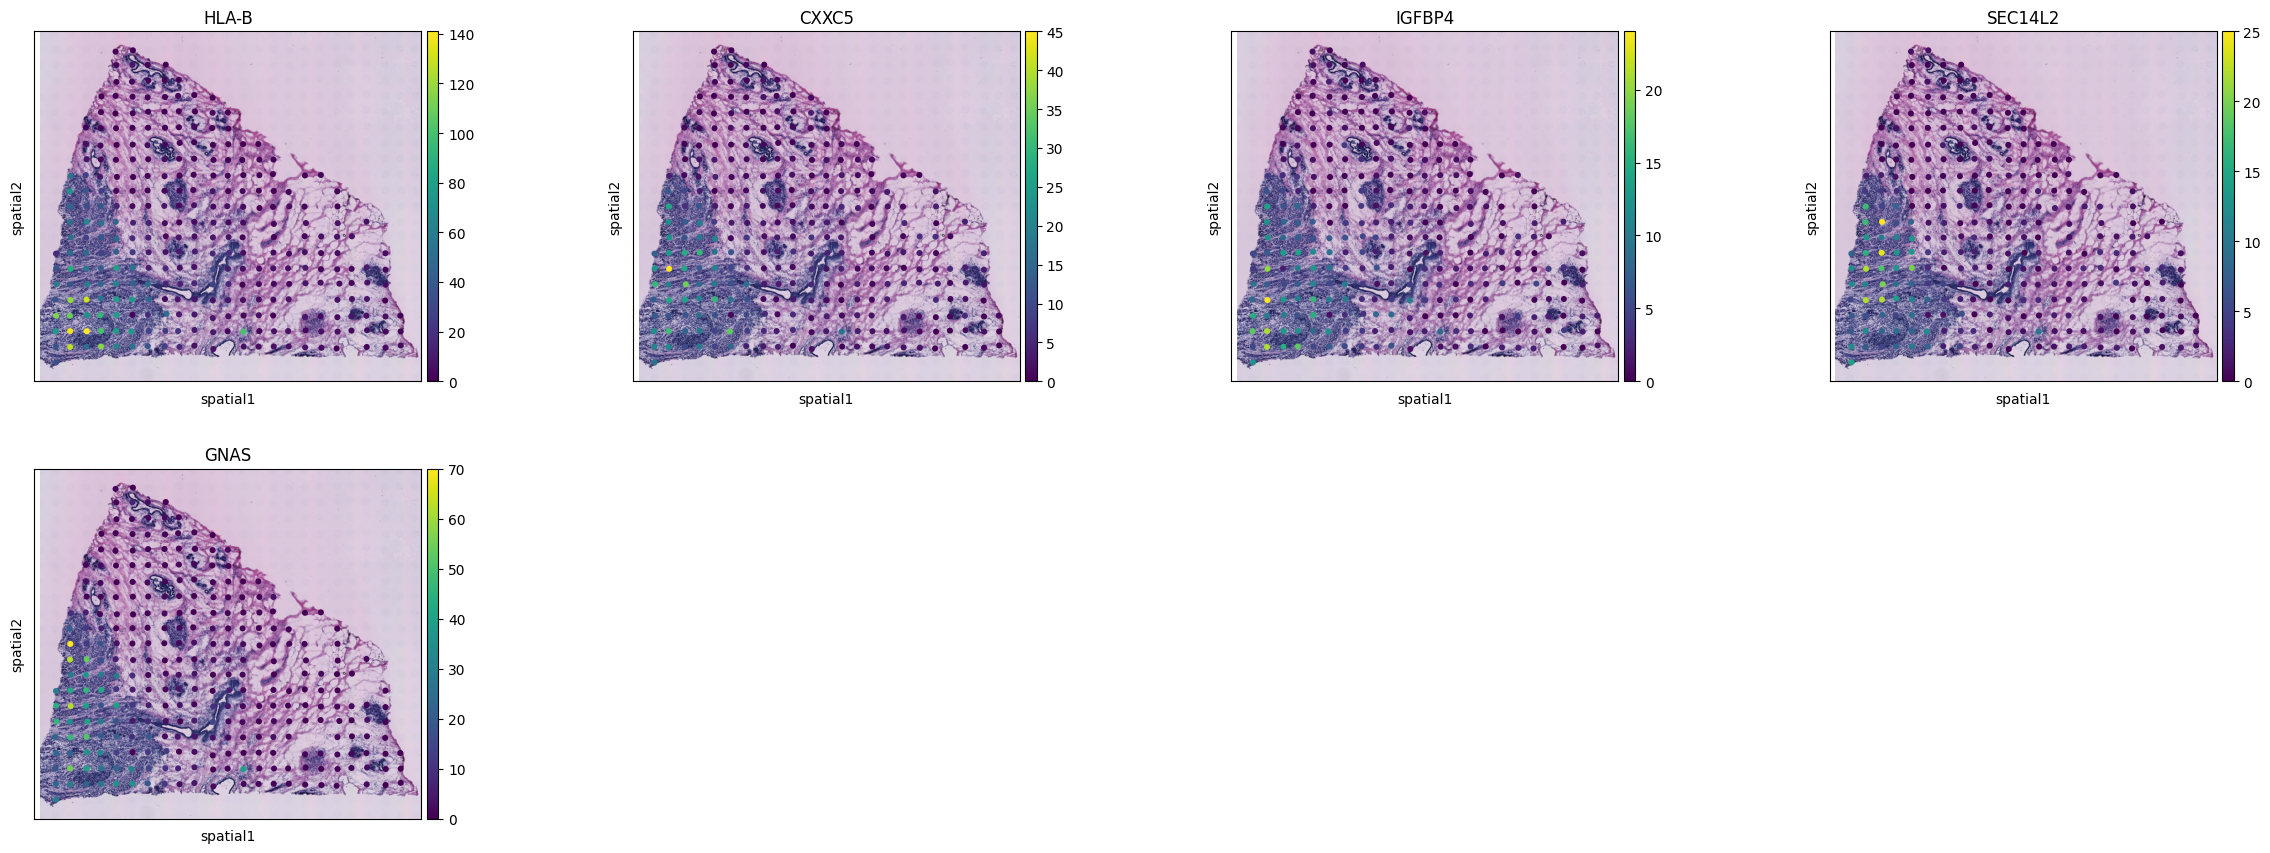

In [21]:
sc.pl.spatial(adata, color=['HLA-B', 'CXXC5', 'IGFBP4', 'SEC14L2', 'GNAS'], img_key="hires", basis='spatial')

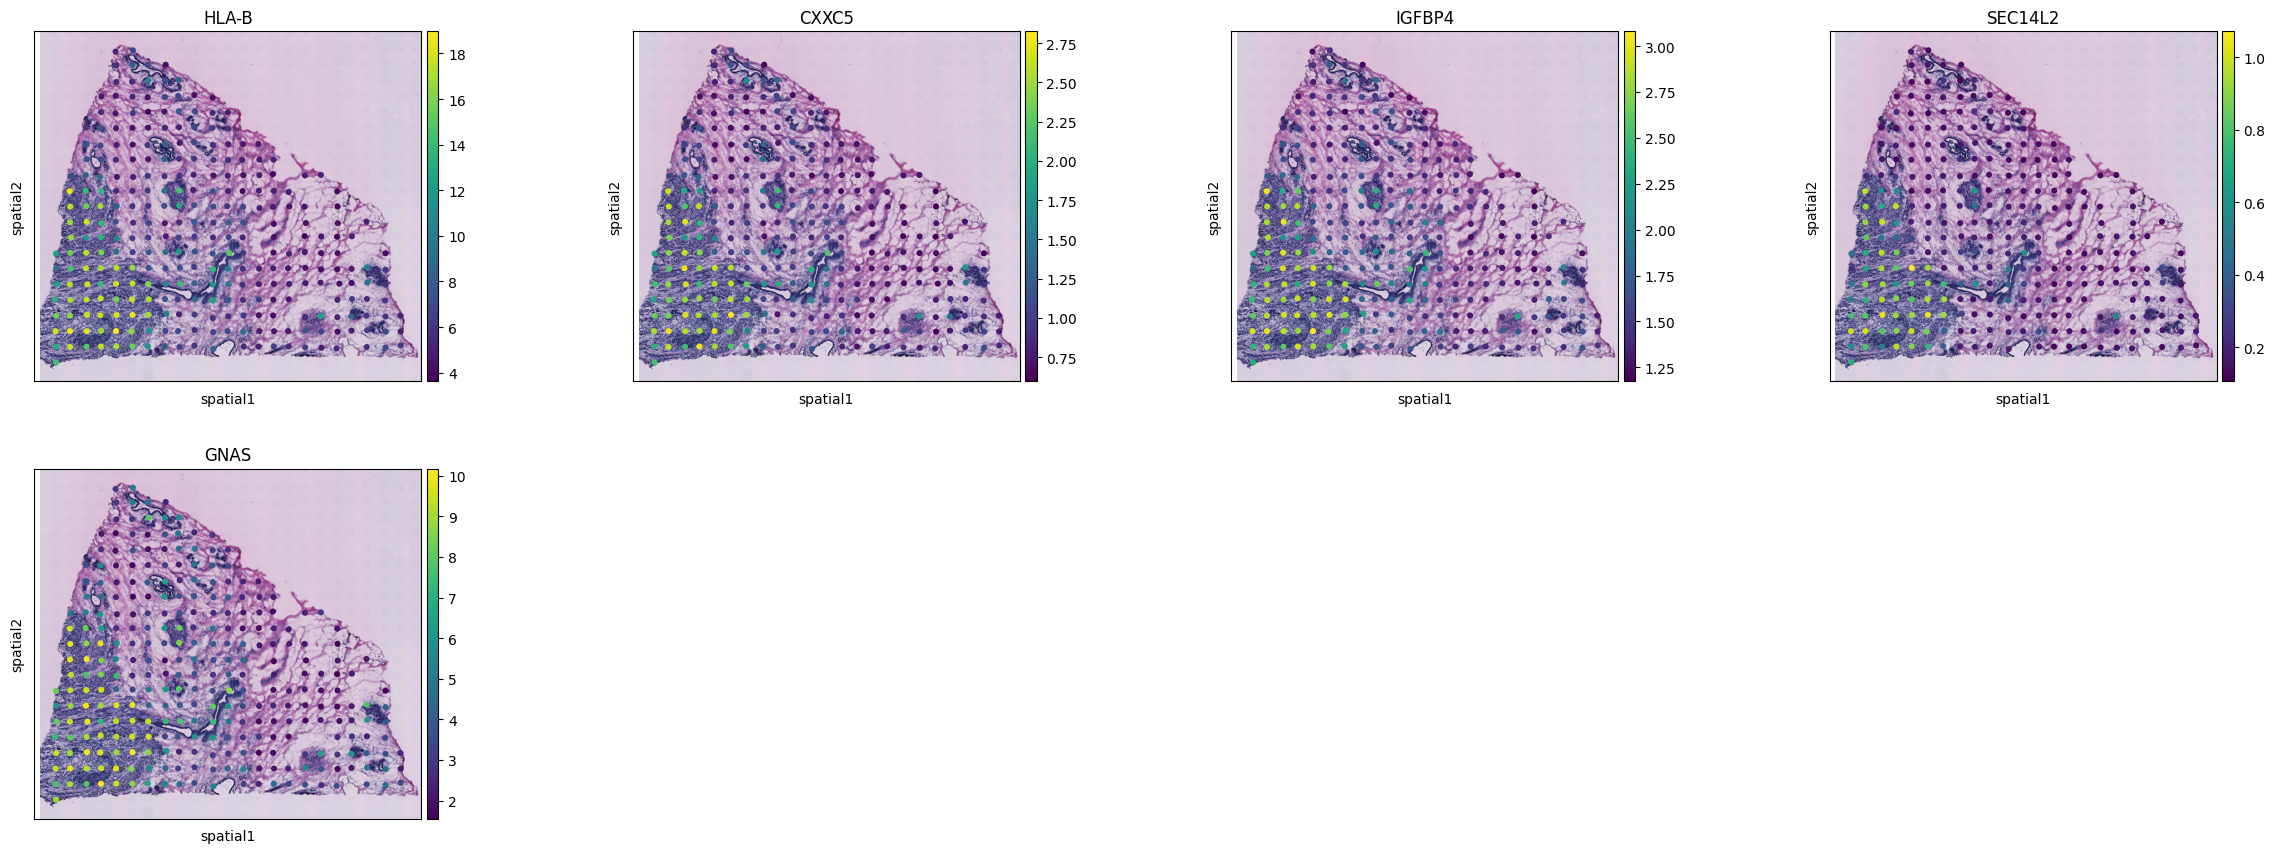

In [22]:
sc.pl.spatial(adata_impute, color=['HLA-B', 'CXXC5', 'IGFBP4', 'SEC14L2', 'GNAS'], img_key="hires", basis='spatial')

In [24]:
pcc.to_csv('./log/OldST_All_B1/scInter_pcc.csv', header=True, index=True)